# INFO 2950: Final Project Phase II

Andrew Chung, hc893

## Research Question

How have COVID-induced shifts in societal trends and mode of transit shaped the post-pandemic recovery of the MTA's  public transit agencies? We seek to quantify the differences between transit modes and capture new, emerging ridership patterns.

## Data Description

- The dataset comprises $1,776$ rows pertaining to a single day of observation spanning the time range $03/10/2020-01/14/2025$. Each column concerns the daily total ridership counts, daily ridership as a proportion of pre-pandemic levels for a comparable day, and engineered time-based features (`year`, `month`, `day_of_week`, `is_weekend` indicator) for the MTA agencies of NYC Subway, NYC Buses, LIRR, and MNR.
- The data set was compiled through funding by the Metropolitan Transportation Authority (MTA) -- a public benefit corporation -- for greater public transparency into the transit system's daily usage and recovery following the COVID-19 pandemic.
- The data reports estimates, derived from turnstile usage, ticket counts/scans, passenger counters, and random sampling; it is therefore subject to influences from day-to-day variability, discrepancies between, methodologies, and anomalies such as fare evasion (which, notably, has increased over the pandemic).
- To prepare data for analysis, we filtered redundant columns, standardized names, converted data to their proper types, and engineered time-based features.
- Though individuals consciously engage in activities such as swiping in, handing their tickets, and more, they are unaware that their trips are recorded by the MTA; i.e. implied consent.
- The raw source data can be found on the New York State Open Data Portal: https://data.ny.gov/Transportation/MTA-Daily-Ridership-Data-2020-2025/vxuj-8kew/about_data

## Data Collection and Cleaning

The raw data file was downloaded from the NYS Open Data portal, available also through their API endpoint. This public dataset is curated by the MTA as part of an initiative for transparency on transit usage.

The data set contained $15$ distinct columns accounting for the daily ridership numbers of NYC Subway, NYC Buses, LIRR, MNR, Access-A-Ride, Bridges&Tunnels, and SIR, in addition to comparative pre-pandemic levels. 

Dates, ridership numbers, and pre-pandemic percentages were stored as generic object types and contained characters like `,` and `%`, rendering them incompatible for further analysis without thorough cleaning; the steps of which are detailed below.

### Import Data

Here, I imported the four essential Python libraries (Numpy, Pandas, Matplotlib, Seaborn) as well as the raw data file (`.csv`) as a Pandas Data Frame.

For the purposes of the project, we decided to narrow our focus to four of the most heavily used MTA agencies:

1. NYC Subway
2. NYC Buses
3. Long Island Rail Road (LIRR)
4. Metro-North Rail Road (MNR)

In our data file, the first 9 columns pertain to the date and, for each of the 4 transit agencies, their daily ridership numbers and corresponding percentage comparison to pre-pandemic levels. To that end, I used `.iloc()` to filter the remaining 6 columns pertaining to other MTA agencies.

In [1]:
# This cell imports the essential Python libraries for our analysis:
## pd = For dataframe manipulation
## np = numerical operations
## plt/sns = EDA visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'MTA_Daily_Ridership_Data__2020_-_2025_20251019.csv'
data_raw = pd.read_csv(path)
print("Original columns:")
print(data_raw.columns)

# We are only concerned with the first 9 columns, i.e. timestamp (DateTime), 
# the Subway, Buses, LIRR, and MNR.
data = data_raw.iloc[:, :9] 
print(data.head())

Original columns:
Index(['Date', 'Subways: Total Estimated Ridership',
       'Subways: % of Comparable Pre-Pandemic Day',
       'Buses: Total Estimated Ridership',
       'Buses: % of Comparable Pre-Pandemic Day',
       'LIRR: Total Estimated Ridership',
       'LIRR: % of Comparable Pre-Pandemic Day',
       'Metro-North: Total Estimated Ridership',
       'Metro-North: % of Comparable Pre-Pandemic Day',
       'Access-A-Ride: Total Scheduled Trips',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day',
       'Bridges and Tunnels: Total Traffic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day'],
      dtype='object')
         Date Subways: Total Estimated Ridership  \
0  03/01/2020                          2,212,965   
1  03/02/2020                          5,329,915   
2  03/03/2020                          5,481,103   
3  03/04/2020     

### Standardization of Column Names

The next step of my data cleaning workflow was standardizing column names for enhanced accessibility; I used lowercase and underscores to abbreviate column names (originally containing spaces and `:` and `%` characters) by passing a `dict` object containing original and formatted names into `rename()` function. This was done to reduce the possibility of a syntax error later down the road and improve readability.

Next, I checked data types (`dtype`) for each of the 9 columns; all were of type `object`, i.e. they weren't immediately viable for mathematical operations and EDA.

In [3]:
# mapping original names (difficult to parse/work with due to 
# special characters and spaces) to standardized names.
mapping = {
    'Date': 'date',
    'Subways: Total Estimated Ridership': 'subways_total_ridership',
    'Subways: % of Comparable Pre-Pandemic Day': 'subways_pct_pre_pandemic',
    'Buses: Total Estimated Ridership': 'buses_total_ridership',
    'Buses: % of Comparable Pre-Pandemic Day': 'buses_pct_pre_pandemic',
    'LIRR: Total Estimated Ridership': 'lirr_total_ridership',
    'LIRR: % of Comparable Pre-Pandemic Day': 'lirr_pct_pre_pandemic',
    'Metro-North: Total Estimated Ridership': 'mnr_total_ridership',
    'Metro-North: % of Comparable Pre-Pandemic Day': 'mnr_pct_pre_pandemic'
}
data = data.copy()
data.rename(columns = mapping, inplace = True)
# print(data.columns)
print("Filtered columns and their data types:\n")

# due to the MTA's formtting of numerical data with commas and percentage signs,
#  all numeric columns are currently of object dtype.
# We need to clean and convert these columns to appropriate numeric types
for col in data.columns:
    print(f"{col}: {data[col].dtype}")

Filtered columns and their data types:

date: object
subways_total_ridership: object
subways_pct_pre_pandemic: object
buses_total_ridership: object
buses_pct_pre_pandemic: object
lirr_total_ridership: object
lirr_pct_pre_pandemic: object
mnr_total_ridership: object
mnr_pct_pre_pandemic: object


### `DateTime` Conversion, Reformatting Numerical Values, and Checking for Missing Values

Arguably the most crucial step, here I corrected the data types for all columns. 

- I directly applied `to_datetime()` to convert `date` from an `object` to `DateTime` variable
- For ridership and percentage columns, I removed `,` and `%` characters, then used `to_numeric()` to cast values into numeric data types. Percentage values were converted into proportions through dividing by $100$.

Without proper date and numeric data types, no meaningful analysis, calculation, or visualization is possible. This step transforms the data from simple text into quantifiable information suitable for downstream analysis.

Finally, I used `data.isnull().sum()`, which tallies the number of missing or invalid values by column. Thankfully, no missing values were found throughout the cleaned dataset, eliminating the need for me to interpolate data points or systematically remove entries.

https://stackoverflow.com/questions/59349484/why-does-df-isnull-sum-work-the-way-it-does

In [4]:
# Convert 'date' column from str to datetime
data['date'] = pd.to_datetime(data['date'])
numeric_cols = data.columns.drop('date') # all columns except 'date'

# Identify columns to clean based on their names
# Numeric columns fall under the categories of either Ridership or % Pre-Pandemic.
total_columns = [col for col in numeric_cols if 'total_ridership' in col]
pct_columns = [col for col in numeric_cols if 'pct_pre_pandemic' in col]

# Clean and convert ridership columns (handle commas)
# e.g. "1,234" -> 1234
print("Cleaning total ridership/traffic columns...")
for col in total_columns:
    # 'coerce' would  replace erroneous conversions with NaN
    data[col] = pd.to_numeric(
        data[col].str.replace(',', '', regex = False), errors = 'coerce'
    )

# Clean and convert percentage columns (remove '%' and convert to proportion)
print("Cleaning percentage columns...")
for col in pct_columns:
    # Convert percentage (0-100) to proportion (0-1)
    data[col] = pd.to_numeric(
        data[col].str.replace('%', '', regex = False), errors = 'coerce'
    ) / 100

print("Data types corrected/re-formatted.")

# check for missing values, if any, and handle them accordingly
# print number of missing values per column
n_missing = data.isnull().sum()
print(n_missing)

Cleaning total ridership/traffic columns...
Cleaning percentage columns...
Data types corrected/re-formatted.
date                        0
subways_total_ridership     0
subways_pct_pre_pandemic    0
buses_total_ridership       0
buses_pct_pre_pandemic      0
lirr_total_ridership        0
lirr_pct_pre_pandemic       0
mnr_total_ridership         0
mnr_pct_pre_pandemic        0
dtype: int64


### Feature Engineering for Modeling

I engineered new features directly from the `date` column, namely the `year`, `month`, and `day_of_week` (Monday, Tuesday, ...) from `data['date'].dt`; such features would allow me to perform time series analyses at varying chronological scales. Additionally I encoded a binary (0/1) variable `is_weekend` for Saturday or Sunday dates. Finally, the `date` column was encoded as the index.

I anticipate the above new features to be essential for aggregating and grouping the data to analyze temporal patterns, such as seasonality (month/year) and weekly commuting behaviors (day_of_week/is_weekend).

In [5]:
# Extract time-based features from 'date' column: year, month, day_of_week
# is_weekend is useful for transit data analysis, 
# as ridership is often lower on weekends

# will be stored as a dummy variable (0/1).
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.day_name() # e.g., 'Monday', 'Tuesday', etc.
data['is_weekend'] = data['day_of_week']\
    .isin(['Saturday', 'Sunday']).astype(int)

# set 'date' as index col for easier EDA
data.set_index('date', inplace = True)
print(data.head())

            subways_total_ridership  subways_pct_pre_pandemic  \
date                                                            
2020-03-01                  2212965                      0.97   
2020-03-02                  5329915                      0.96   
2020-03-03                  5481103                      0.98   
2020-03-04                  5498809                      0.99   
2020-03-05                  5496453                      0.99   

            buses_total_ridership  buses_pct_pre_pandemic  \
date                                                        
2020-03-01                 984908                    0.99   
2020-03-02                2209066                    0.99   
2020-03-03                2228608                    0.99   
2020-03-04                2177165                    0.97   
2020-03-05                2244515                    1.00   

            lirr_total_ridership  lirr_pct_pre_pandemic  mnr_total_ridership  \
date                                

In [6]:
# save fully cleaned data set
data.to_csv(
    'MTA_data_cleaned.csv', 
    index_label = 'date'
)

## Exploratory Data Analysis (EDA)

Below are the code used for EDA and their quantitative/visual outputs.

To kick things off, I plotted the percentage recovery data for each of the 4 transit agencies, specifically applying a **28-day rolling average** (roughly a month; 4 weeks) for smoothing and noise reduction. The curves were superimposed on a single time-series chart, dubbed with vertical lines as markers for pandemic-era and post-pandemic events.

Smoothing the data with a rolling average reduces noise and helps elucidate the underlying trends. Divergence in the paths of the four transit agencies are immediately obvious; by 2024, commuter rails (LIRR, MNR) show the highest percentage recovery, while urban transit (subways and buses) lag behind. The vertical annotations were used to add real-world context, juxtaposing shifts (or lack thereof) of ridership/recovery patterns in esponse to major policy changes.

https://stackoverflow.com/questions/49104228/axvline-and-axhline-in-a-loop-for-multiple-subplots

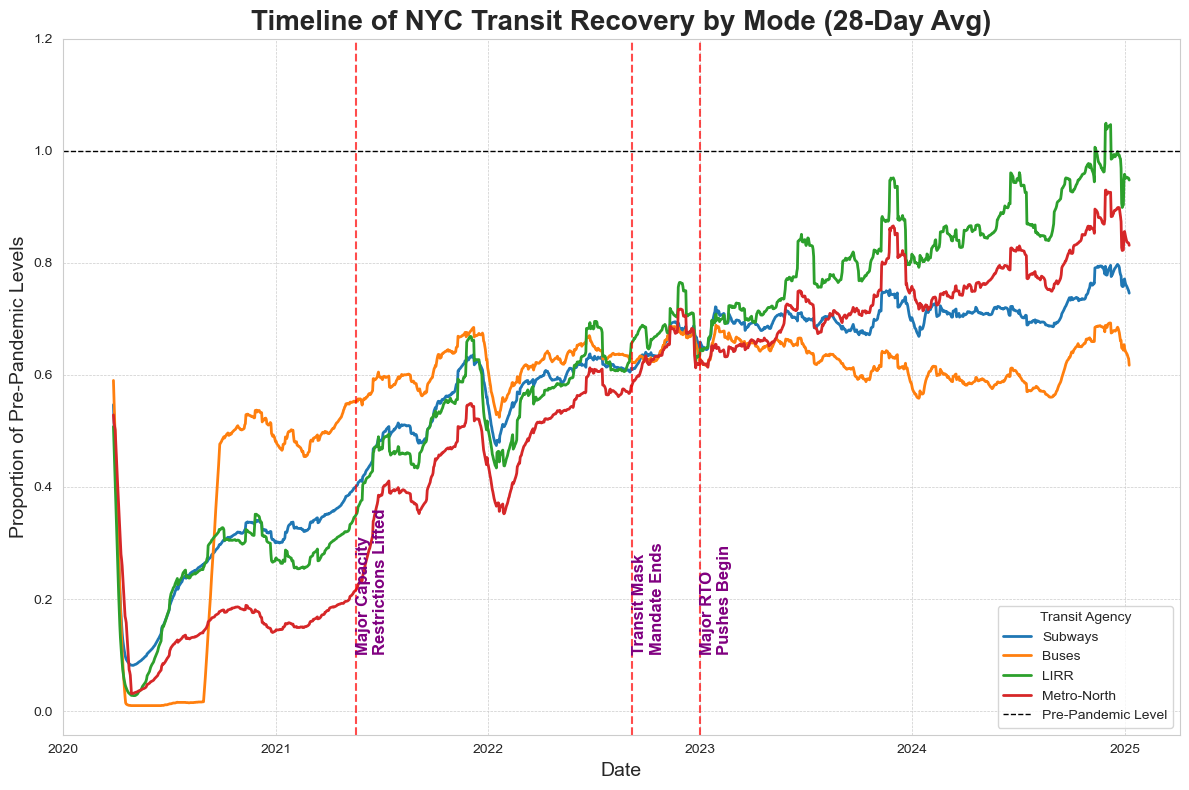

In [7]:
# Objective: Visually correlate recovery trajectories of transit modes with external catalysts.
# A 28-day rolling average clarifies month-long trends and reduces the weekly variations/noise

recovery_pct_cols = {
    'subways_pct_pre_pandemic': 'Subways',
    'buses_pct_pre_pandemic': 'Buses',
    'lirr_pct_pre_pandemic': 'LIRR',
    'mnr_pct_pre_pandemic': 'Metro-North'
}

# Compute 28-day rolling averages for smoother visualization
rolling_avg = data[list(recovery_pct_cols.keys())]\
    .rolling(window = 28).mean()

# Create figure
plt.figure(figsize = (12, 8))
sns.set_style("whitegrid")

# Plot each transit mode
for col in rolling_avg.columns:
    plt.plot(
        rolling_avg.index,
        rolling_avg[col],
        label=recovery_pct_cols[col],
        linewidth=2
    )

# Key event dates and policy changes for annotation (CITATION NEEDED)
key_events = {
    # '2020-03-13': 'US Declares\nNational Emergency',
    '2021-05-19': 'Major Capacity\nRestrictions Lifted',
    '2022-09-07': 'Transit Mask\nMandate Ends',
    '2023-01-01': 'Major RTO\nPushes Begin' # RTO = Return to Office
}
for date, label in key_events.items():
    event_date = pd.to_datetime(date)
    plt.axvline(
        x = event_date, color = 'red', linestyle = '--', linewidth = 1.5, alpha = 0.7
    )
    plt.text(
        event_date, 0.1, label,
        rotation = 90, verticalalignment = 'bottom',
        fontsize = 12, color = 'purple', weight = 'bold'
    )

# Reference line for pre-pandemic level (1)
plt.axhline(
    1.0, color = 'black', linestyle = '--', 
    linewidth = 1, label = 'Pre-Pandemic Level'
)
plt.title(
    'Timeline of NYC Transit Recovery by Mode (28-Day Avg)', 
    fontsize = 20, weight = 'bold'
)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Proportion of Pre-Pandemic Levels', fontsize = 14)
plt.yticks(np.arange(0, 1.21, 0.2))
plt.legend(title = 'Transit Agency', fontsize = 10)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

Next, we generated a $1\times 4$ grid of box plots to visualize the distribution of daily recovery percentages for each transit mode, by day of week, ordered from Monday to Sunday. Below that, we added an additional $1\times 4$ grid of histograms to show the full distribution of daily recovery percentages over the entire data set.

We sought to understand the variability and central tendency of ridership on different days. Evidently, variability is greater for railroad transit in general (subway, LIRR, MNR -- wider boxes) as opposed to buses. Additionally, the histogram deciphers the overall trends of recovery post-pandemic throughout 4 full years; through visual inspection we can identify transit agencies exhibiting higher recovery rates i.e. resiliency overall (e.g. LIRR recovering more fully than the Buses/Subway) and strengthen our concept of recovery consistency.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

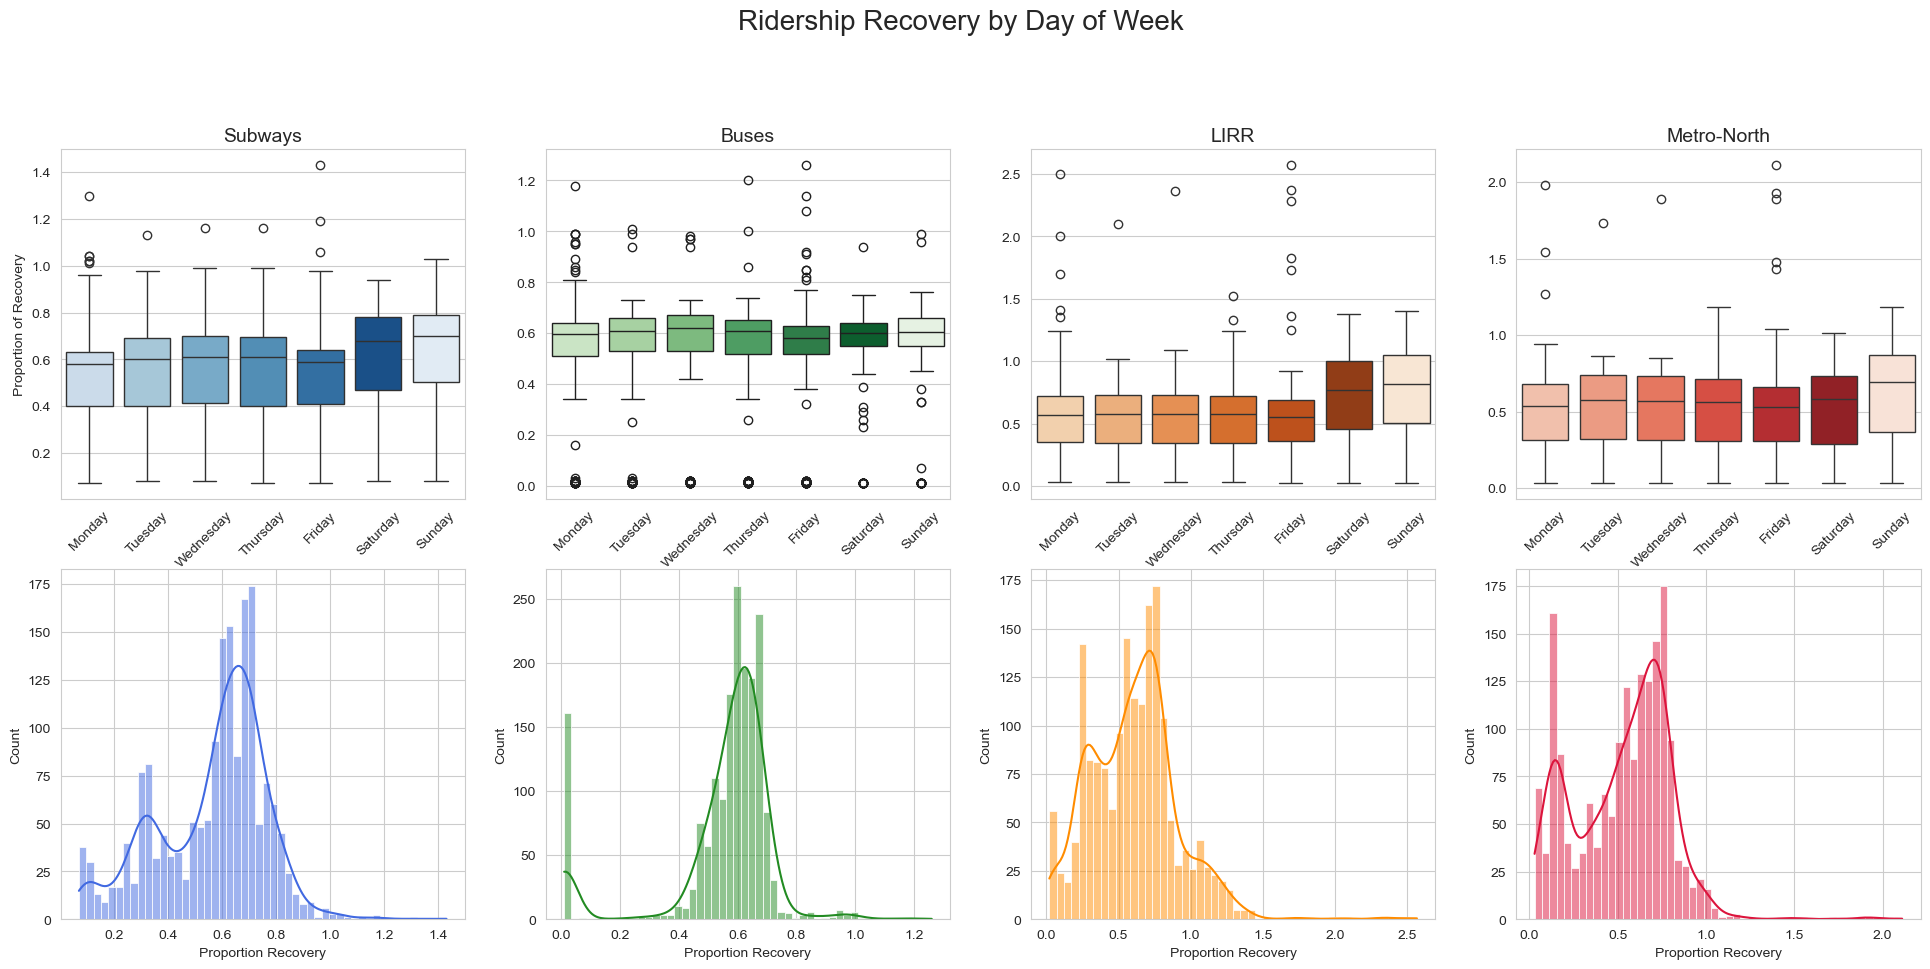

In [8]:
day_order = [
    'Monday', 'Tuesday', 'Wednesday', 
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

fig, axes = plt.subplots(2, 4, figsize = (24, 10))
fig.suptitle('Ridership Recovery by Day of Week', fontsize=20, y=1.02)
palettes = ['Blues', 'Greens', 'Oranges', 'Reds']
colors = ['royalblue', 'forestgreen', 'darkorange', 'crimson']
for i, mode in enumerate(recovery_pct_cols.keys()):
    # boxplot by day_of_week
    sns.boxplot(
        ax = axes[0, i], data = data, x = 'day_of_week', y = mode,
        hue = 'day_of_week', legend = False, 
        order = day_order, palette = palettes[i]
    )
    axes[0, i].set_title(recovery_pct_cols[mode], fontsize = 14)
    axes[0, i].set_xlabel('Day of Week')
    axes[0, i].set_ylabel('Proportion of Recovery' if i == 0 else '')
    axes[0, i].tick_params(axis = 'x', rotation = 45)

    # aggregate histplot
    sns.histplot(
        data[mode], ax = axes[1, i], kde = True, # distribution curve estimate
        color = colors[i], bins = 50
    )
    axes[1, i].set_xlabel('Proportion Recovery')

### Quantitative and Correlational Analysis

I aimed to explore numerical relationships between variables through the computation of correlation coefficients:

- between the recovery rate and daily ridership for each transit agency, to confirm the consistency between raw figures and pre-pandemic proportions and identify possible redundancy
- between the recovery rates of different transit agency, as a correlation matrix, to identify potential collinearity and common patterns between agency-specific trends

The heatmap confirms strong positive correlatios among the transit agencies, particularly those between rail services. We are convinced that policy changes are implemented in similar manners among them (e.g. mask protocol in trains, return of ordinary city/suburban travel). Though moderate, correlation with buses are slightly weaker.

In [9]:
# correlation between recovery rate and daily ridership for each transit agency
for mode in ['subways', 'buses', 'lirr', 'mnr']:
    print(f'{mode}:', data[f'{mode}_total_ridership']\
        .corr(data[f'{mode}_pct_pre_pandemic']))
# there is moderate to strong correlation present, but variations do exist.

subways: 0.6459840034449095
buses: 0.7483955280411292
lirr: 0.44840303728071973
mnr: 0.709440457570833


                          subways_pct_pre_pandemic  buses_pct_pre_pandemic  \
subways_pct_pre_pandemic                     1.000                   0.816   
buses_pct_pre_pandemic                       0.816                   1.000   
lirr_pct_pre_pandemic                        0.908                   0.650   
mnr_pct_pre_pandemic                         0.926                   0.668   

                          lirr_pct_pre_pandemic  mnr_pct_pre_pandemic  
subways_pct_pre_pandemic                  0.908                 0.926  
buses_pct_pre_pandemic                    0.650                 0.668  
lirr_pct_pre_pandemic                     1.000                 0.932  
mnr_pct_pre_pandemic                      0.932                 1.000  


<Axes: >

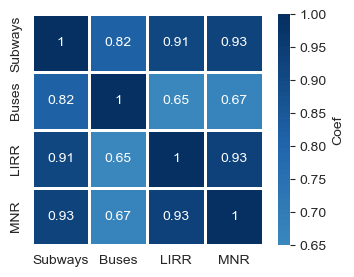

In [10]:
# Correlation Matrix between Recovery Rates (Proportion of Pre-Pandemic)
matrix = data[pct_columns].corr()
print(matrix.round(3))
labels = ['Subways', 'Buses', 'LIRR', 'MNR']

plt.figure(figsize = (4, 3))
sns.heatmap(
    matrix, annot = True, cmap = 'RdBu', center = 0,
    square = True, linewidths = 1, cbar_kws = {'label': 'Coef'},
    xticklabels = labels, yticklabels = labels
)

## Data Limitations

1. The ridership figures are estimates by the MTA, and may not be fully accurate; they are also subject to changes in count methodology or variations between lines/boroughs.
2. The MTA states that recovery proportions are computed against a "comparable pre-pandemic day" but does not elaborate in enough technical detail as to its definition. This leaves the data susceptible to systematic biases that can significantly alter the validity of our findings.
3. The data set is deprecated as of early 2025, so discoveries made may not be perfectly reflective of the state of MTA agencies at present. Our conclusions about emerging travel patterns can thus be outdated and fail to inform sensible policy decisions correctly.
4. Other than ridership figures, the data set lacks information on rider demographics, service operations, or more that could add new dimensions to our analysis and implications on policymaking. We could thus overlook external societal factors and fail to deliver results that can benefit everyone equally.

## Questions for Reviewers

- Are there other quantitative metrics, figures, or statistical analyses you recommend to formally assess the significance of the differences in recovery patterns?
- We have considered statistical tests to quantify the divergence between the recovery rates, for example ANOVA for group differences by year. How would you suggest we proceed?
- Our EDA shows that commuter rail (LIRR/MNR) recovery on weekends can actually exceed their pre-pandemic baseline. Can this suggest a shift towards their roles for non-commuter travel, and what would be a good method to test this hypothesis and similar questions that could arise down the road?
- Additionally, would you suggest that we combine LIRR and MNR into a single "commuter rail" category, provided their high correlation coefficient ($+0.93$)?